In [1]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
# n_values = [4, 8, 16, 4, 8, 4]
# n_attributes = [3, 3, 3, 4, 4, 5]
# n_epochs = 300
# n_datasets = len(datasets)
# paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]
datasets = ['(3,4)', '(4,4)', '(4,8)']
n_values = [4, 4, 4]
n_attributes = [3, 4, 8]
n_epochs = 300
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

## training

IndexError: index 3 is out of bounds for axis 0 with size 3

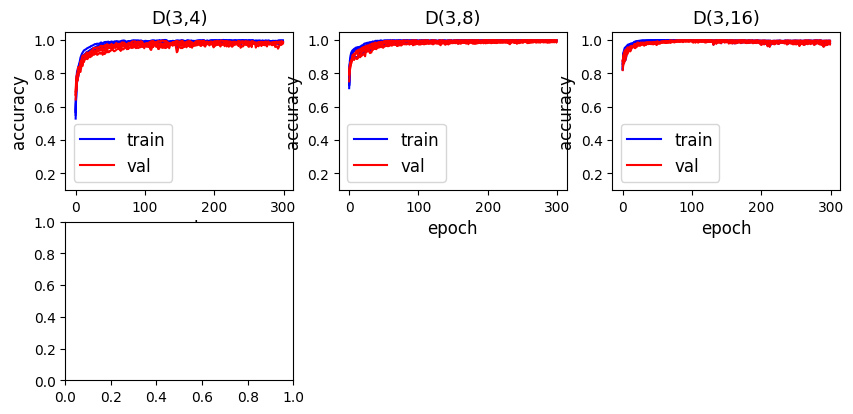

In [3]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=False)
plot_training_trajectory(all_accuracies['train_acc'], all_accuracies['val_acc'], ylim=(0.1, 1.05), steps=(1, 1))

## final accuracies 

In [7]:
all_accuracies = load_accuracies(paths, n_runs=4, val_steps=1, zero_shot=True, context_unaware=True) # TODO: change n_runs to 5 once I have the 4,8 dataset complete
#accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc'], 
#              all_accuracies['zs_acc_objects'], all_accuracies['zs_acc_abstraction']]
#accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc'],
#              all_accuracies['cu_train_acc'], all_accuracies['cu_val_acc']]
zero_shot_accs_specific = all_accuracies['zs_specific_test_acc']
zero_shot_accs_generic = all_accuracies['zs_generic_test_acc']
cu_zs_accs_specific = all_accuracies['cu_zs_specific_test_acc']
cu_zs_accs_generic = all_accuracies['cu_zs_generic_test_acc']

In [8]:
for i, dataset in enumerate(zero_shot_accs_specific):
    print("(standard) Mean test accuracy over runs: " + str(round(dataset.mean(), 3)) + " (" + str(round(dataset.std(), 3)) + ")")
    print("(context-unaware) Mean test accuracy over runs: " + str(round(cu_zs_accs_specific[i].mean(), 3)) + " (" + str(round(cu_zs_accs_specific[i].std(), 3)) + ")")

(standard) Mean test accuracy over runs: 0.907 (0.013)
(context-unaware) Mean test accuracy over runs: 0.918 (0.013)
(standard) Mean test accuracy over runs: 0.951 (0.004)
(context-unaware) Mean test accuracy over runs: 0.941 (0.012)
(standard) Mean test accuracy over runs: 0.95 (0.004)
(context-unaware) Mean test accuracy over runs: 0.923 (0.008)


In [9]:
for i, dataset in enumerate(zero_shot_accs_generic):
    print("(standard) Mean test accuracy over runs: " + str(round(dataset.mean(), 3)) + " (" + str(round(dataset.std(), 3)) + ")")
    print("(context-unaware) Mean test accuracy over runs: " + str(round(cu_zs_accs_generic[i].mean(), 3)) + " (" + str(round(cu_zs_accs_generic[i].std(), 3)) + ")")

(standard) Mean test accuracy over runs: 0.718 (0.042)
(context-unaware) Mean test accuracy over runs: 0.632 (0.038)
(standard) Mean test accuracy over runs: 0.81 (0.064)
(context-unaware) Mean test accuracy over runs: 0.803 (0.078)
(standard) Mean test accuracy over runs: 0.808 (0.075)
(context-unaware) Mean test accuracy over runs: 0.833 (0.048)


In [8]:
# get accuracy means and sds for table representation
final_accuracies_train = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['train_acc'][i][run][-1])
    final_accuracies_train[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_train

{'(3,4)': (0.978, 0.011),
 '(3,8)': (0.982, 0.002),
 '(3,16)': (0.98, 0.003),
 '(4,4)': (0.981, 0.008),
 '(4,8)': (0.984, 0.006),
 '(5,4)': (0.997, 0.001)}

In [5]:
# context unaware
final_accuracies_train = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['cu_train_acc'][i][run][-1])
    final_accuracies_train[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_train

{'(3,4)': (0.994, 0.004),
 '(3,8)': (0.993, 0.004),
 '(3,16)': (0.989, 0.004),
 '(4,4)': (0.996, 0.003),
 '(4,8)': (0.992, 0.002),
 '(5,4)': (0.996, 0.001)}

In [7]:
final_accuracies_val = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['val_acc'][i][run][-1])
    final_accuracies_val[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_val

{'(3,4)': (0.955, 0.016),
 '(3,8)': (0.974, 0.003),
 '(3,16)': (0.978, 0.003),
 '(4,4)': (0.974, 0.01),
 '(4,8)': (0.983, 0.005),
 '(5,4)': (0.997, 0.002)}

In [6]:
# context unaware
final_accuracies_val = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['cu_val_acc'][i][run][-1])
    final_accuracies_val[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_val

{'(3,4)': (0.989, 0.007),
 '(3,8)': (0.99, 0.004),
 '(3,16)': (0.987, 0.005),
 '(4,4)': (0.993, 0.004),
 '(4,8)': (0.987, 0.004),
 '(5,4)': (0.993, 0.002)}

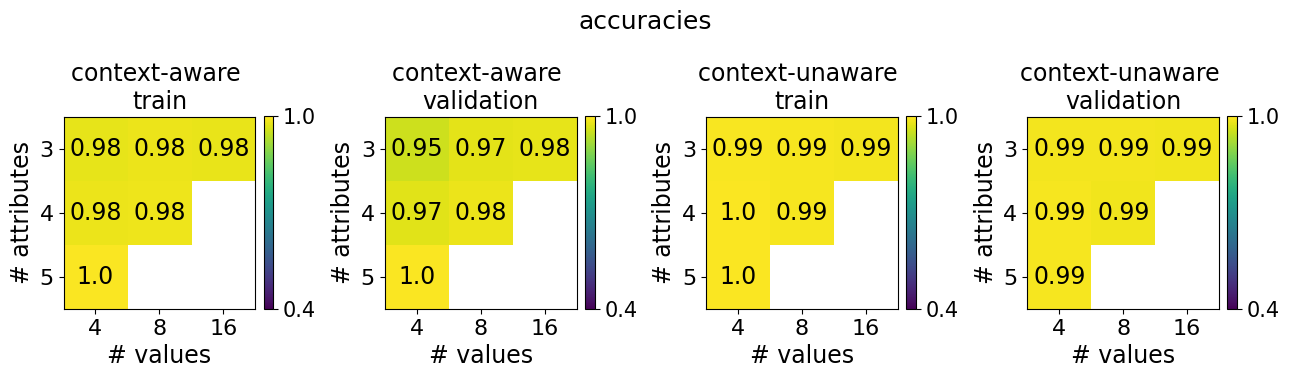

In [4]:
plot_heatmap(accuracies, 'mean', plot_dims=(1,4), ylims=(0.4, 1.0), figsize=(13, 3.5), suptitle='accuracies', 
             fontsize=17)

## entropy scores 

In [6]:
entropy_scores = load_entropies(paths)
entropies = [entropy_scores['NI'], entropy_scores['effectiveness'], entropy_scores['consistency']]

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:104: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])


In [7]:
entropy_dict = {}
for i, score in enumerate(list(entropy_scores.keys())[:3]):
    results = entropies[i]
    mean = np.nanmean(results, axis=-1)
    sd = np.std(results, axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict[d + score] = (round(mean[idx], 3), round(sd[idx], 3))
entropy_dict


{'(3,4)NI': (0.899, 0.014),
 '(3,8)NI': (0.904, 0.029),
 '(3,16)NI': (0.79, 0.016),
 '(4,4)NI': (0.91, 0.014),
 '(4,8)NI': (0.494, 0.028),
 '(5,4)NI': (0.856, 0.019),
 '(3,4)effectiveness': (0.922, 0.019),
 '(3,8)effectiveness': (0.898, 0.036),
 '(3,16)effectiveness': (0.732, 0.026),
 '(4,4)effectiveness': (0.958, 0.017),
 '(4,8)effectiveness': (0.885, 0.05),
 '(5,4)effectiveness': (0.883, 0.013),
 '(3,4)consistency': (0.877, 0.012),
 '(3,8)consistency': (0.91, 0.028),
 '(3,16)consistency': (0.858, 0.01),
 '(4,4)consistency': (0.867, 0.015),
 '(4,8)consistency': (0.343, 0.02),
 '(5,4)consistency': (0.83, 0.026)}

In [26]:
# from generic to specific
entropies_hierarchical = [entropy_scores['NI_hierarchical'], entropy_scores['effectiveness_hierarchical'], entropy_scores['consistency_hierarchical']]
entropy_dict_hierarchical = {}
for i, score in enumerate(list(entropy_scores.keys())[3:]):
    results = entropies_hierarchical[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_hierarchical[d + score] = mean[idx] #(mean[idx], sd[idx])
entropy_dict_hierarchical


{'(3,4)NI_hierarchical': array([0.94890859, 0.92758896, 0.90534409]),
 '(3,8)NI_hierarchical': array([0.92025451, 0.91729138, 0.9021918 ]),
 '(3,16)NI_hierarchical': array([0.80965867, 0.82107998, 0.78268653]),
 '(4,4)NI_hierarchical': array([0.89898419, 0.92974464, 0.92363052, 0.90444903]),
 '(4,8)NI_hierarchical': array([0.42047994, 0.48509646,        nan,        nan]),
 '(5,4)NI_hierarchical': array([0.87118133, 0.89839789, 0.89997813, 0.8789201 , 0.8675404 ]),
 '(3,4)effectiveness_hierarchical': array([1.        , 0.97895852, 0.96614494]),
 '(3,8)effectiveness_hierarchical': array([0.95942609, 0.92709728, 0.90257714]),
 '(3,16)effectiveness_hierarchical': array([0.86847827, 0.79152011, 0.72441223]),
 '(4,4)effectiveness_hierarchical': array([1.        , 0.99595116, 0.99034655, 0.98505777]),
 '(4,8)effectiveness_hierarchical': array([0.9556611 , 0.95378193,        nan,        nan]),
 '(5,4)effectiveness_hierarchical': array([0.99437522, 0.97592677, 0.96252488, 0.94200112, 0.94620526

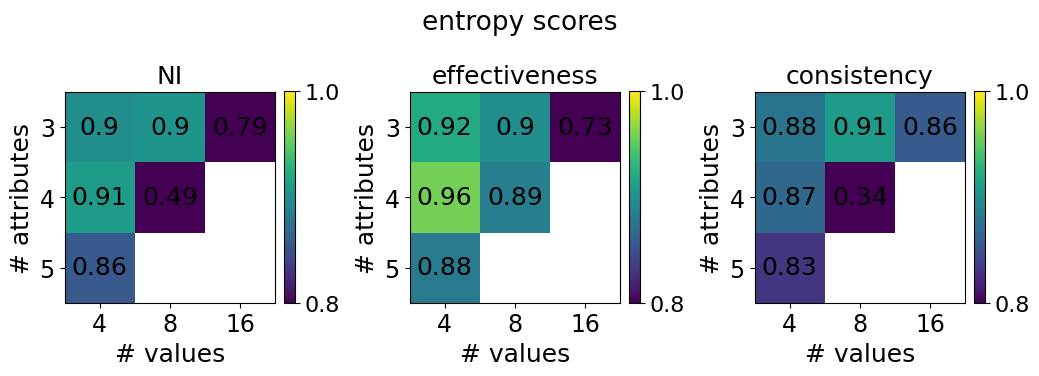

In [27]:
plot_heatmap(entropies, 'mean', plot_dims=(1,3), ylims=(0.8, 1.0), figsize=(10.5, 3.5), 
             titles = ('NI', 'effectiveness', 'consistency'), suptitle='entropy scores')

In [28]:
data_list, run_list, level_list = [], [], []
NMI_hierarchical, effectiveness_hierarchical, consistency_hierarchical = [], [], []

for d, data in enumerate(datasets):
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + '/standard/' + str(run) + '/entropy_scores.pkl', 'rb'))
        
        for l, level in enumerate([1, 2, 3, 4, 5]):  
            
            data_list.append(data)
            run_list.append(run)
            level_list.append(level)
            
            try: 
                NMI_hierarchical.append(scores['normalized_mutual_info_hierarchical'][l])
                effectiveness_hierarchical.append(scores['effectiveness_hierarchical'][l])
                consistency_hierarchical.append(scores['consistency_hierarchical'][l])
            except: 
                NMI_hierarchical.append(np.nan)
                effectiveness_hierarchical.append(np.nan)
                consistency_hierarchical.append(np.nan)

entropy_dict_hierarchical = {'data': data_list, 'level': level_list, 'run': run_list, 'NI': NMI_hierarchical, 
                             'effectiveness': effectiveness_hierarchical, 'consistency': consistency_hierarchical}


In [29]:
pd.Series(entropy_dict_hierarchical['consistency'])

0      0.904499
1      0.883356
2      0.841159
3           NaN
4           NaN
         ...   
145    0.685144
146    0.800132
147    0.819273
148    0.809903
149    0.798240
Length: 150, dtype: float64

In [30]:
all_hierarchical = {}
all_hierarchical['metric'] = ['NI'] * 150 + ['effectiveness'] * 150 + ['consistency'] * 150
all_hierarchical['value'] = (entropy_dict_hierarchical['NI'] + 
                             entropy_dict_hierarchical['effectiveness'] + 
                             entropy_dict_hierarchical['consistency'])
all_hierarchical['level'] = entropy_dict_hierarchical['level'] * 3

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


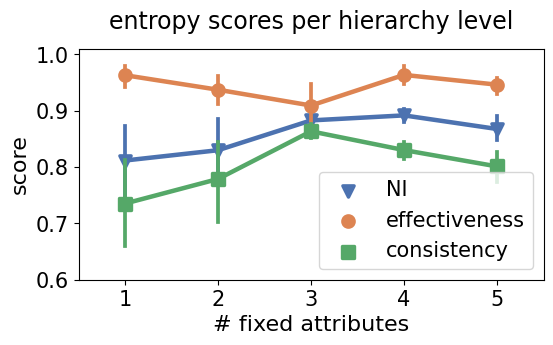

In [35]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_hierarchical, hue='metric', 
                   markers=['v', 'o', 's'], palette='deep', scale=1.2)
plt.ylabel('score', fontsize=16)
plt.title('entropy scores per hierarchy level', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

## message length and symbol redundancy

In [20]:
context_unaware = False # whether original or context_unaware simulations are evaluated
if context_unaware:
    setting = 'context_unaware'
else:
    setting = 'standard'

In [21]:
ml_dict = {'level': [], 'data set': [], 'run': [], 'message length': []}
for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        # if evaluated after training from interaction this is an array showing the message length
        # per level of concreteness (most abstract --> most concrete)
        ml_hierarchical = pickle.load(open(paths[d] + '/' + str(setting) + '/' + str(run) + 
                                           '/message_length_hierarchical.pkl', 'rb'))
        
        # if evaluated with the callback throughout training, you get an array for each epoch
        if isinstance(ml_hierarchical, dict): 
            ml_hierarchical = ml_hierarchical['message_length_train'][n_epochs]
            
        for level in range(5):
            
            ml_dict['level'].append(level)
            ml_dict['run'].append(run)
            ml_dict['data set'].append(dataset)
            try: 
                ml_dict['message length'].append(ml_hierarchical[level])
            except: 
                ml_dict['message length'].append(np.NaN)

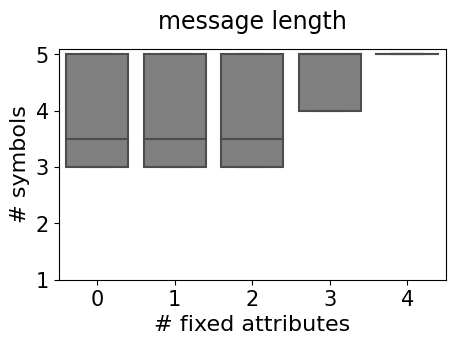

In [22]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='message length', data=ml_dict, color='gray')
plt.xticks(fontsize=15)
plt.yticks(ticks=[1,2,3,4,5], labels=[1,2,3,4,5], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('# symbols', fontsize=16)
plt.title('message length', fontsize=17, y=1.05)
plt.show()

In [ ]:
# Not done (yet)
symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + 'standard/' + str(run) + '/symbol_redundancy.pkl', 'rb'))
            
        for level in range(5):
            
            symbol_redundancy_dict['level'].append(level)
            symbol_redundancy_dict['run'].append(run)
            symbol_redundancy_dict['data set'].append(dataset)
            try: 
                symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
            except: 
                symbol_redundancy_dict['symbol frequency'].append(np.NaN)

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict, color='gray')
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# relevant attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy', fontsize=17, y=1.05)
plt.show()

## compositionality

In [25]:
topsim, posdis, bosdis = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))
topsim_specific, posdis_specific, bosdis_specific = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim_score = pickle.load(open(paths[d] + '/standard/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent_score = pickle.load(open(paths[d] + '/standard/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        topsim[d, run] = topsim_score['topsim_train']
        posdis[d, run] = disent_score['posdis']
        bosdis[d, run] = disent_score['bosdis']
        topsim_specific[d, run] = topsim_score['topsim_specific_train']
        posdis_specific[d, run] = disent_score['posdis_specific']
        bosdis_specific[d, run] = disent_score['bosdis_specific']

In [26]:
for i, d in enumerate(datasets):
    print(d, "topsim", round(np.mean(topsim[i]), 3))

(3,4) topsim 0.363
(3,8) topsim 0.241
(3,16) topsim 0.184
(4,4) topsim 0.336
(4,8) topsim 0.308
(5,4) topsim 0.463


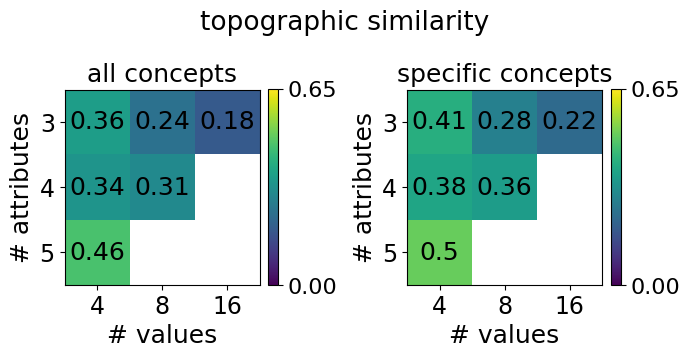

In [28]:
plot_heatmap([topsim, topsim_specific], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5), 
             titles=['all concepts', 'specific concepts'], suptitle='topographic similarity', suptitle_position=1.)

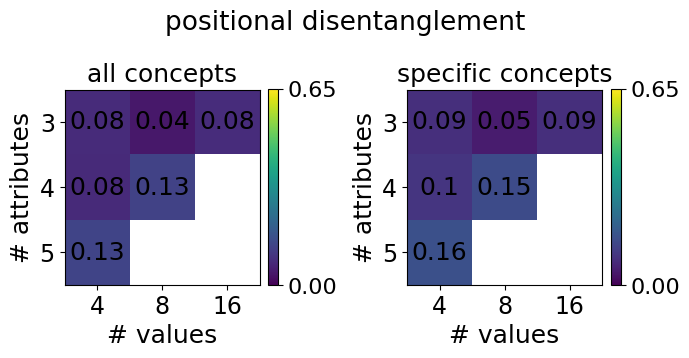

In [30]:
plot_heatmap([posdis, posdis_specific], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5),
             titles=['all concepts', 'specific concepts'], suptitle='positional disentanglement', suptitle_position=1.)

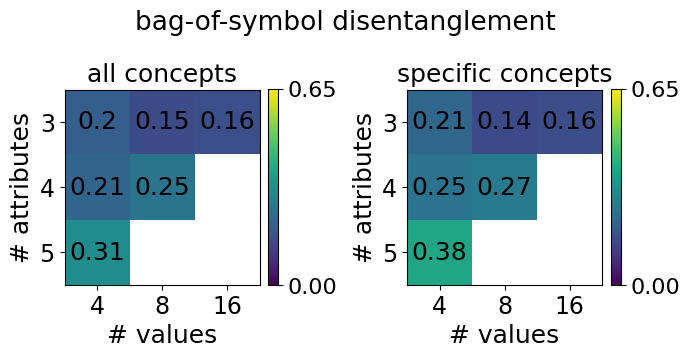

In [31]:
plot_heatmap([bosdis, bosdis_specific], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5),
             titles=['all concepts', 'specific concepts'], suptitle='bag-of-symbol disentanglement', suptitle_position=1.)

In [32]:
# compositionality scores for each data set

compositionality_scores = {'dataset':[], 'run':[], 'metric':[], 'data':[], 'score':[]}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim = pickle.load(open(paths[d] + '/standard/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent = pickle.load(open(paths[d] + '/standard/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        
        for metric in ['topsim', 'posdis', 'bosdis']:
            #for data in ['all', 'concrete']: 
            for data in ['all']:
                
                compositionality_scores['dataset'].append(dataset)
                compositionality_scores['run'].append(run)
                compositionality_scores['metric'].append(metric)
                compositionality_scores['data'].append(data)
                
                append = '' if data == 'all' else '_max_relevance'
                    
                if metric == 'topsim':
                    compositionality_scores['score'].append(topsim['topsim' + append + '_train'])
                if metric == 'posdis':
                    compositionality_scores['score'].append(disent['posdis' + append])
                if metric == 'bosdis':
                    compositionality_scores['score'].append(disent['bosdis' + append])

compositionality_scores = pd.DataFrame(compositionality_scores)

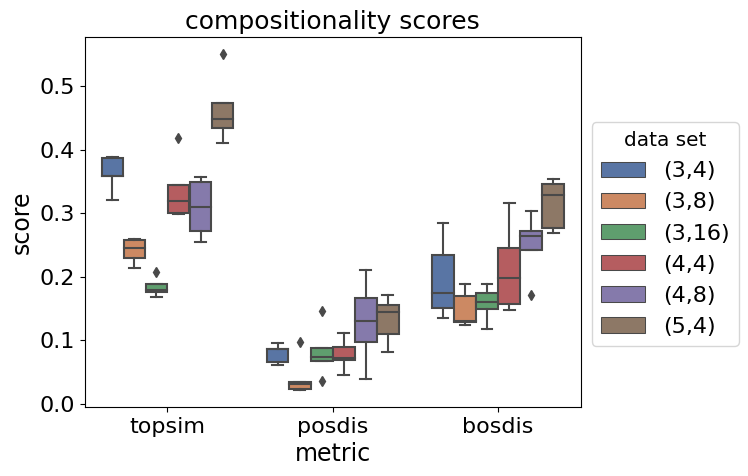

In [33]:
sns.boxplot(x='metric', y='score', data=compositionality_scores[compositionality_scores.data=='all'], 
            hue='dataset', palette='deep')
plt.xlabel(xlabel='metric', fontsize=17)
plt.ylabel(ylabel='score', fontsize=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
legend = plt.legend(fontsize=16, title='data set', bbox_to_anchor=(1., 0.8))
plt.setp(legend.get_title(),fontsize='x-large')
plt.title('compositionality scores', fontsize=18)
plt.show()

In [ ]:
# Not done (yet)
# compositionality scores for different vocab size factors 

compositionality_scores = {'vs factor':[], 'run':[], 'metric':[], 'score':[]}

for vsf in [1, 2, 3, 4]: 
    for run in range(5):
        
        path = 'results/(4,8)_sample_scaling_10_balanced_False_vsf_' + str(vsf) + '/'
        
        topsim = pickle.load(open(path + 'standard/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent = pickle.load(open(path + 'standard/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        
        for metric in ['topsim', 'posdis', 'bosdis']:
                
                compositionality_scores['vs factor'].append(vsf)
                compositionality_scores['run'].append(run)
                compositionality_scores['metric'].append(metric)

                if metric == 'topsim':
                    compositionality_scores['score'].append(topsim['topsim_train'])
                if metric == 'posdis':
                    compositionality_scores['score'].append(disent['posdis'])
                if metric == 'bosdis':
                    compositionality_scores['score'].append(disent['bosdis'])

compositionality_scores = pd.DataFrame(compositionality_scores)

## co-occurrences

In [ ]:
# Not done (yet)
full_plot = False

fig = plt.figure(figsize=(12,3))

for d, dim in enumerate(datasets): 
    
    data = datasets[d]
    path = paths[d]
    vs_factor = int(path[-2])
    vocab_size = (n_values[d] + 1) * vs_factor + 1
    colors = plt.cm.jet(np.linspace(0,1,vocab_size))
    
    average_cooccurences = []
    
    plt.subplot(1,6,d+1)
    
    for run in range(5):
        
        cooccurences = pickle.load(open(paths[d] + 'standard/' + str(run) + '/normalized_cooccurrence.pkl', 'rb'))
        indices = np.flip(np.argsort(cooccurences[:,-1]))
        cooccurences = cooccurences[indices]
        average_cooccurences.append(cooccurences)
        
    average_cooccurences = np.flip(np.mean(average_cooccurences, axis=0), axis=1)
    
    data_dict = {}
    data_dict['symbol rank'] = []
    data_dict['level'] = []
    data_dict['value'] = []
    for symbol in indices:
        for level in range(average_cooccurences.shape[1]):
            data_dict['symbol rank'].append(symbol+1)
            data_dict['level'].append(level)
            data_dict['value'].append(average_cooccurences[symbol, level])
    
    if full_plot:
        g = sns.heatmap(average_cooccurences, cmap='viridis')
        plt.yticks(ticks=[0.5,vocab_size-1.5], labels=[1,vocab_size], fontsize=14)
    else: 
        g = sns.heatmap(average_cooccurences[0:10,:], cmap='viridis')
        plt.yticks(ticks=[0.5,9.5], labels=[1,10], fontsize=14, rotation=0)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=13)
    for _, spine in g.spines.items():
        spine.set_visible(True)
    #plt.xlabel('# relevant attributes', fontsize=14)
    #plt.ylabel('symbol rank', fontsize=14)
    plt.xticks(ticks=np.arange(n_attributes[d])+0.5, labels=range(1,n_attributes[d]+1), fontsize=14)
    plt.title(data, fontsize=14)
    
    fig.text(0.5, -0.05, '# relevant attributes', ha='center', va='center', fontsize=15, alpha=0.3)
    fig.text(-0.01, 0.5, 'symbol rank', ha='center', va='center', rotation='vertical', fontsize=15, alpha=0.3)

plt.tight_layout()